In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [3]:
df_mean = titanic.copy()
means = df_mean.Survived.groupby(df_mean.Sex).mean()
display(means)
df_mean["Sex_encoded"] = df_mean.Sex.map(means)
df_mean

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [4]:
#pd.get_dummies(df_onehot, columns=["Embarked"])
df_onehot = titanic.copy()

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
df_onehot.Embarked.fillna(df_onehot.Embarked.mode()[0], inplace=True)
encoded_features = enc.fit_transform(df_onehot[["Embarked"]]).astype(np.uint8)
encoded_features

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [5]:
categories=enc.categories_[0].tolist()
pd.DataFrame(encoded_features, columns=categories).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [6]:
df_label = titanic.copy()
df_label.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
df_label.Cabin.fillna(df_label.Cabin.mode()[0], inplace=True)
df_label.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df_label["Cabin_enc"] = enc.fit_transform(df_label.Cabin)
df_label

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,47
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,47
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,47
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S,47
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,60


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

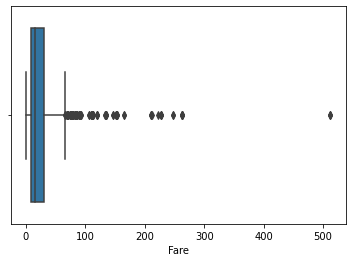

In [9]:
#python kodu buraya
sns.boxplot(x=titanic.Fare)
plt.show()

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [10]:
df = titanic.copy()
z_score = (df.Fare - df.Fare.mean() ) / df.Fare.std()
outlier_mask = ((z_score<-3) | (z_score>3))
zscore_outlier = (z_score>3).sum() + (z_score<-3).sum()
print('Z-score Outlier Değer :', zscore_outlier)

Z-score Outlier Değer : 20


In [11]:
df_zscore = df[outlier_mask]
df_zscore["Fare"].min(), df_zscore["Fare"].max(), df_zscore.shape

(211.3375, 512.3292, (20, 12))

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [12]:
#python kodu buraya
upper_replace_value = df[z_score<=3]['Fare'].max()
lower_replace_value = df[z_score>=-3]['Fare'].min()

lower_replace_value, upper_replace_value

(0.0, 164.8667)

In [13]:
df_zscore_replaced = df.copy()
df_zscore_replaced["Fare"][z_score>3] = upper_replace_value
df_zscore_replaced["Fare"][z_score<-3] = lower_replace_value

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df["Fare"].min(), df["Fare"].max()

(0.0, 512.3292)

In [15]:
df_zscore_replaced["Fare"].min(), df_zscore_replaced["Fare"].max(), df_zscore_replaced.shape

(0.0, 164.8667, (891, 12))

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [16]:
q1 = df["Fare"].quantile(q=0.25)
q3 = df["Fare"].quantile(q=0.75)
iqr = q3-q1
iqr

23.0896

In [17]:
iqr_upper_limit = q3 + 1.5*iqr
iqr_lower_limit = q1 - 1.5*iqr
iqr_lower_limit, iqr_upper_limit

(-26.724, 65.6344)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [18]:
#python kodu buraya
df_iqr_replaced = df.copy()
df_iqr_replaced["Fare"][df["Fare"] > iqr_upper_limit] = iqr_upper_limit
df_iqr_replaced["Fare"][df["Fare"] < iqr_lower_limit] = iqr_lower_limit

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
iqr_outlier = (df["Fare"]<iqr_lower_limit).sum() + (df["Fare"]>=iqr_upper_limit).sum()
print("IQR outlier sayısı:",iqr_outlier)

IQR outlier sayısı: 116


In [20]:
df_iqr_replaced["Fare"].min(), df_iqr_replaced["Fare"].max(), df_iqr_replaced.shape

(0.0, 65.6344, (891, 12))

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [21]:
he_lower_limit = df["Fare"].quantile(q=0.01)
he_upper_limit = df["Fare"].quantile(q=0.99)
he_lower_limit, he_upper_limit

(0.0, 249.00622000000033)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [22]:
df_he_replaced = df.copy()
df_he_replaced["Fare"][df["Fare"] > he_upper_limit] = he_upper_limit
df_he_replaced["Fare"][df["Fare"] < he_lower_limit] = he_lower_limit

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
he_outlier = (df_he_replaced["Fare"]<he_lower_limit).sum() + (df_he_replaced["Fare"]>=he_upper_limit).sum()
print("Hard-Edges outlier sayısı:",he_outlier)

Hard-Edges outlier sayısı: 9


In [24]:
df_he_replaced["Fare"].min(), df_he_replaced["Fare"].max(), df_he_replaced.shape

(0.0, 249.00622000000033, (891, 12))

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [25]:
# Sınır değerleri
print("Zscore sınır değerleri:",lower_replace_value, upper_replace_value)
print("IQR sınır değerleri", iqr_lower_limit, iqr_upper_limit )
print("Hard-Edges sınır değerleri", he_lower_limit, he_upper_limit )

Zscore sınır değerleri: 0.0 164.8667
IQR sınır değerleri -26.724 65.6344
Hard-Edges sınır değerleri 0.0 249.00622000000033


In [26]:
# Outlier Sayıları
print('Z-score outlier sayısı :', zscore_outlier)
print("IQR outlier sayısı:",iqr_outlier)
print("Hard-Edges outlier sayısı:",he_outlier)

Z-score outlier sayısı : 20
IQR outlier sayısı: 116
Hard-Edges outlier sayısı: 9


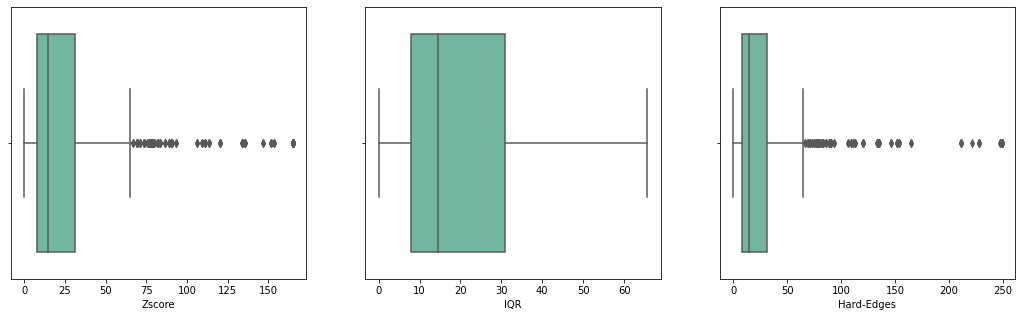

In [27]:
box_plot_list = [df_zscore_replaced.Fare, df_iqr_replaced.Fare, df_he_replaced.Fare]
labels = ['Zscore','IQR','Hard-Edges']

fig, ax = plt.subplots(ncols=3, figsize=(18,5))
count = 0
for i in range(3):
    sns.boxplot(x = box_plot_list[count], palette="Set2",ax=ax[i]).set(xlabel=labels[i])
    count = count+1

#### IQR yöntemi ile diğer yöntemlere göre en iyi outlier temizliğinin olduğu yöntem olduğu görülmüştür. Ama bu şekilde çok fazla veri kaybına sebep olmuştur. Zscore yöntemi diğer yöntemlere göre en ideal yöntemdir. Zscore yöntemini kullanmak daha mantıklı olabilir.